In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# 1. Get data

In [2]:
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import re

import pandas as pd
import seaborn as sns
sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn

In [3]:
housing = pd.read_csv("../input/california-housing-prices/housing.csv")
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# 2. Descriptive Statics

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
housing.corr(method='pearson').sort_values(by='median_income',ascending=False)

longitude  latitude  housing_median_age  total_rooms  \
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
households           0.055310 -0.071035           -0.302916     0.918484   
population           0.099773 -0.108785           -0.296244     0.857126   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   

                    total_bedrooms  population  households  median_income  \
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   
total_rooms               0.930380    0.857126    0.918484       0.198050   
households                0.979728    0.907222    1.000000       0.013033   
population                0.877747    1.000000    0.907222       0.004834   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   

                    median_house_value  
median_income                 0.688075  
median_house_value            1.000000  
total_rooms                   0.134153  
households                    0.065843  
population                   -0.024650  
total_bedrooms                0.049686  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623

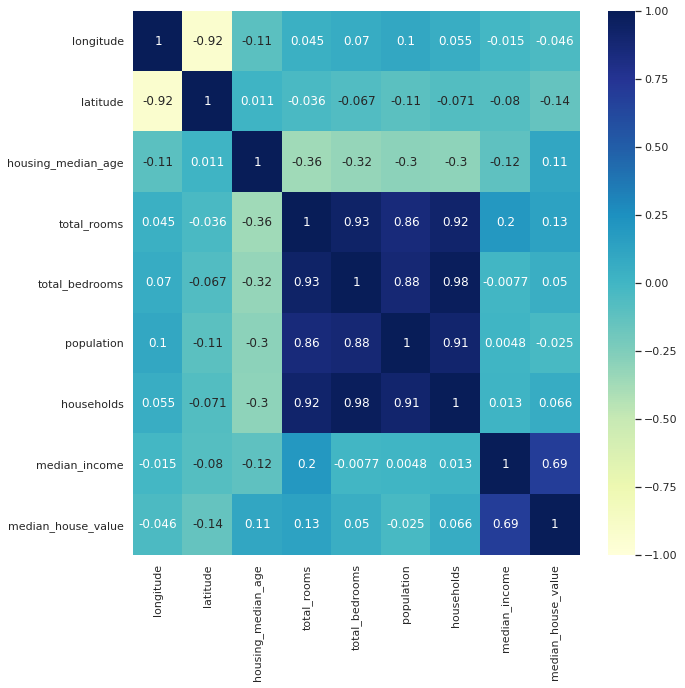

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(housing.corr(), vmin=-1, vmax=1, annot = True,cmap="YlGnBu",ax=ax)

# 3. Feature engineer

In [8]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

a=housing['median_house_value']
housing.loc[(a<=100000) , 'house_value_cat'] = 'Low' 
housing.loc[((a>100000 ) & (a <=200000)) , 'house_value_cat'] = 'Medium'  
housing.loc[((a>200000 ) & (a <=300000)) , 'house_value_cat'] = 'High'    
housing.loc[(a>300000 ) , 'house_value_cat'] = 'Very_high' 

a=housing['median_house_value']
housing.loc[(a<=100000) , 'house_value_cat'] = 0
housing.loc[((a>100000 ) & (a <=200000)) , 'house_value_cat'] = 1
housing.loc[((a>200000 ) & (a <=300000)) , 'house_value_cat'] = 2    
housing.loc[(a>300000 ) , 'house_value_cat'] = 3

# 4. Data visualization

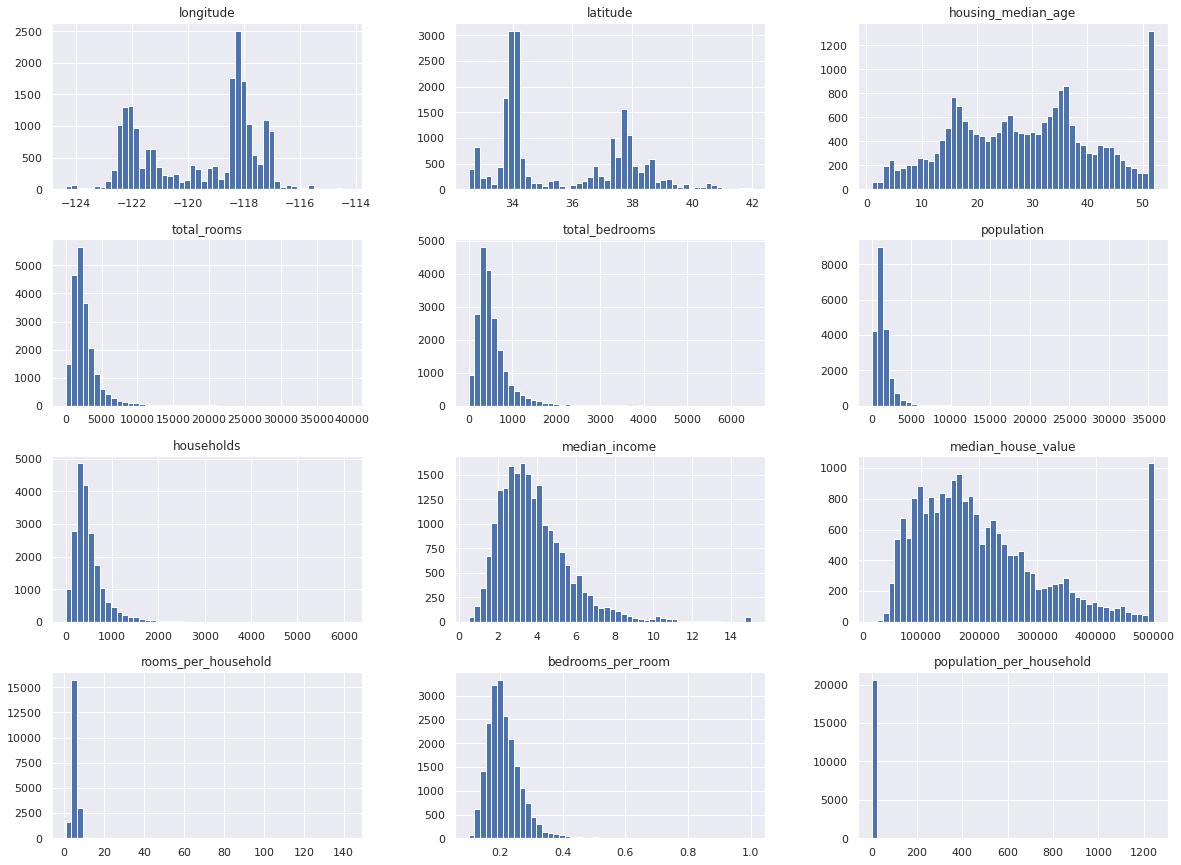

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

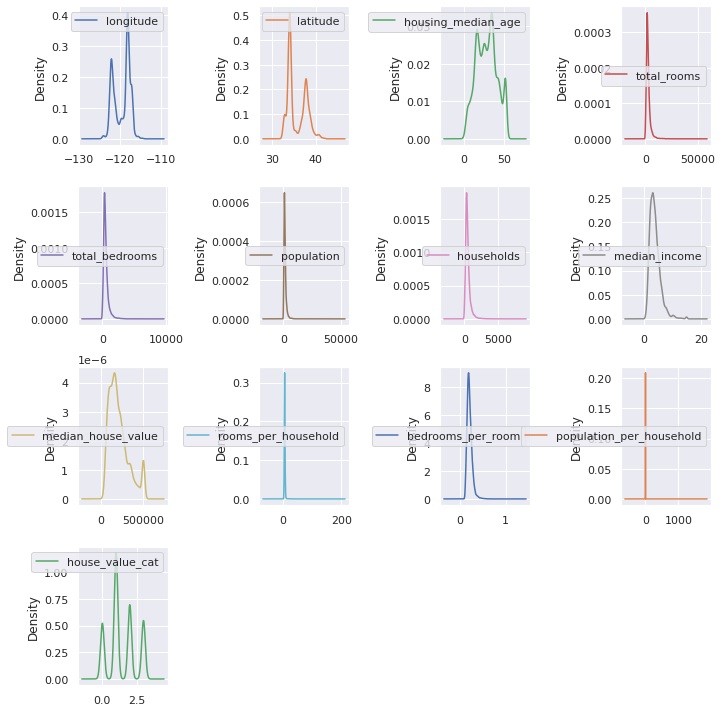

In [11]:
housing.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(10,10))
plt.tight_layout()

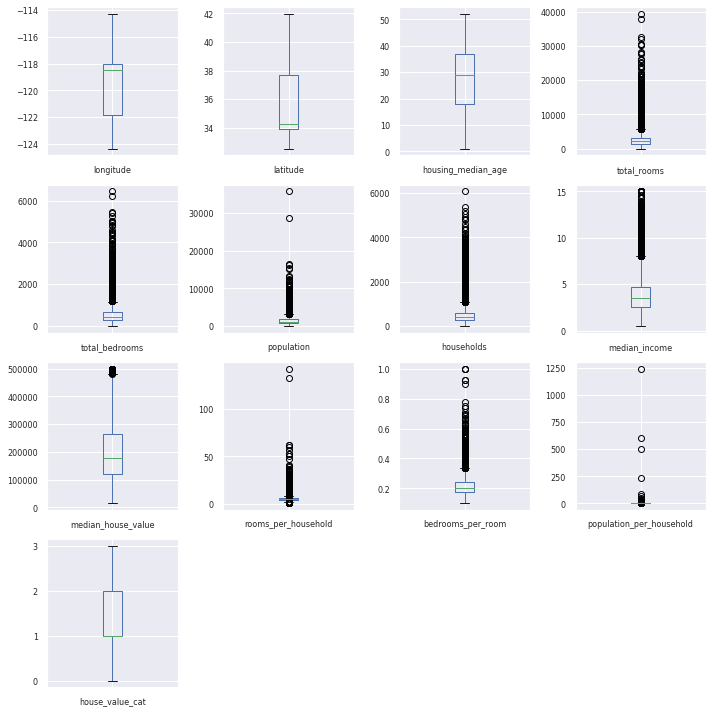

In [12]:
housing.plot(kind='box', subplots=True, layout=(4,4), sharex=False,
fontsize=8,figsize=(10,10))
plt.tight_layout()

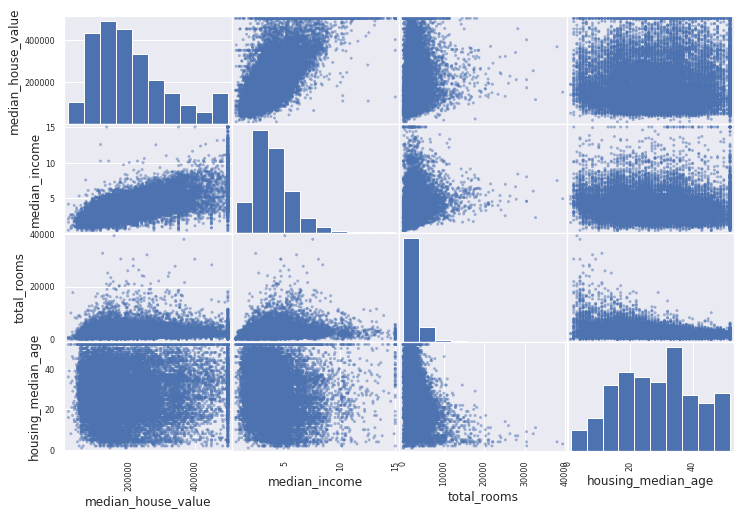

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [14]:
housing_group=housing.groupby('longitude').mean()
housing_group.reset_index(inplace=True)
housing_group.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -124.35     40.54                52.0       1820.0           300.0   
1    -124.30     41.82                18.0       2674.5           541.5   
2    -124.27     40.69                36.0       2349.0           528.0   
3    -124.26     40.58                52.0       2217.0           394.0   
4    -124.25     40.28                32.0       1430.0           419.0   

   population  households  median_income  median_house_value  \
0       806.0       270.0         3.0147             94600.0   
1      1271.0       467.0         2.5055             94700.0   
2      1194.0       465.0         2.5179             79000.0   
3       907.0       369.0         2.3571            111400.0   
4       434.0       187.0         1.9417             76100.0   

   rooms_per_household  bedrooms_per_room  population_per_household  
0             6.740741           0.164835                  2.985185  
1             5.730286           0.202472                  2.721776  
2             5.051613           0.224777                  2.567742  
3             6.008130           0.177718                  2.457995  
4             7.647059           0.293007                  2.320856

In [15]:
import folium

import branca
import branca.colormap as cm

x_start = (housing_group['latitude'].max() + housing_group['latitude'].min()) / 2
y_start = (housing_group['longitude'].max() + housing_group['longitude'].min()) / 2
start_coord = (x_start, y_start)

vmin=housing_group['median_house_value'].min()
vmax=housing_group['median_house_value'].max()
#colormap = cm.LinearColormap(colors=['red','lightblue'],vmin=housing_group['median_house_value'].min(),vmax=housing_group['median_house_value'].max())
colormap=cm.LinearColormap(
    ['green', 'yellow', 'red'],
    vmin=vmin, vmax=vmax)

map = folium.Map(location=start_coord, zoom_start=5)

for lat, lon, house_value, room,population in zip(housing_group['latitude'], housing_group['longitude'], 
                                       housing_group['median_house_value'],housing_group['rooms_per_household'],
                                       housing_group['population']):
  folium.CircleMarker(
        [lat, lon],
        radius=population*0.005,
                        popup = (
                                '<strong>House_value: </strong>: ' + str(house_value) + '<br>'
                                '<strong>Room: </strong>: ' + str(room) + '<br>'
                                '<strong>Population: </strong>: ' + str(population) + '<br>'),
        fill=colormap(house_value),
        color=colormap(house_value),
        fill_opacity=0.7
    ).add_to(map)
map.add_child(colormap)
map.save('map.html')
map

Map visual: radius is population (larger is higher pop), color: house value (more red more value)

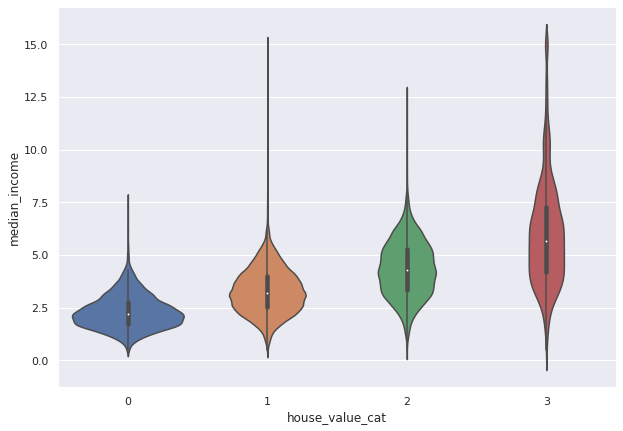

In [16]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='house_value_cat',y='median_income',data=housing)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


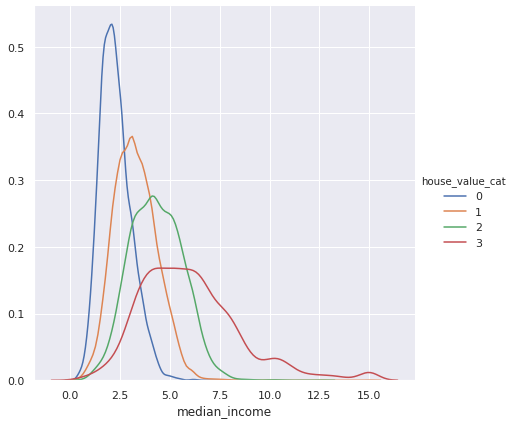

In [17]:
sns.FacetGrid(housing, hue="house_value_cat", size=6) \
   .map(sns.kdeplot, "median_income") \
   .add_legend()
plt.ioff() 

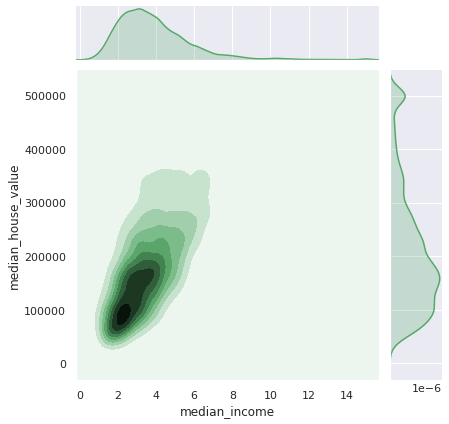

In [18]:
fig=sns.jointplot(x='median_income',y='median_house_value',data=housing,kind='kde',
                  color='g')

Parallel coordinate plot: This type of visualisation is used for plotting multivariate, numerical data. Parallel Coordinates Plots are ideal for comparing many variables together and seeing the relationships between them. For example, if you had to compare an array of products with the same attributes (comparing computer or cars specs across different models).

In [19]:
import plotly.express as px
fig = px.parallel_coordinates(housing, color="house_value_cat",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             #color_continuous_midpoint=2
                              )
fig.show()

In [ ]:
import plotly.express as px
df = px.data.wind()
fig = px.line_polar(housing, r="median_house_value", theta="ocean_proximity", color="house_value_cat", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
#r : do lon tren tung category
#theta: category tren radar chart
#color: mau sac
fig.show()

In [ ]:
plt.figure(figsize=(15, 25))

for i, column in enumerate(housing.columns, 1):
  plt.subplot(8, 2, i)
  housing[housing["house_value_cat"] == 0][column].hist(bins=35, color='blue', label='Low', alpha=0.6)
  housing[housing["house_value_cat"] == 1][column].hist(bins=35, color='red', label='Medium', alpha=0.6)
  housing[housing["house_value_cat"] == 2][column].hist(bins=35, color='red', label='High', alpha=0.6)
  housing[housing["house_value_cat"] == 3][column].hist(bins=35, color='red', label='VeryHigh', alpha=0.6)
  plt.legend()
  plt.xlabel(column)
plt.tight_layout

In [ ]:
px.scatter(housing, x="median_income", y="median_house_value", 
           animation_frame="ocean_proximity",
           #animation_group="age",
           size="rooms_per_household", 
           color="house_value_cat", 
           #hover_name="sex",
           #log_x=True, 
           #size_max=55, range_x=[100,100000], range_y=[25,90]
           )

In [ ]:
a=housing.sort_values(by='housing_median_age')
px.scatter(a, x="median_income", y="median_house_value", 
           animation_frame="housing_median_age",
           #animation_group="age",
           size="rooms_per_household", 
           color="house_value_cat", 
           #hover_name="sex",
           #log_x=True, 
           #size_max=55, range_x=[100,100000], range_y=[25,90]
           )